In [51]:
import nltk #download the stop words from here
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')





[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
#Preprocessing -- takes in a string of messy words and return a string of words after processing
#Remove messy symbols

def remove_symbol (text):
    mess = r"~!@#$%^&*()_+1234567890-=|}{[]\":;'/.,<>?’`Äôòùúäîì"
    for i in range(len(text)):
        for symbol in mess:
            text[i] = text[i].replace(symbol,"")
    return text

#Remove stop words from NLTK
def remove_stopword(text):
    newtext = []
    sw = stopwords.words('english')
    for i in range(len(text)):
        if text[i] not in sw:
            newtext.append(text[i])
    return newtext
#Stemming and Lemmatization 
def stemandlemma(text):
    ps = PorterStemmer()
    #lm = WordNetLemmatizer()
    for i in range(len(text)):
        text[i] = ps.stem(text[i])
        #text[i] = lm.lemmatize(text[i])
    return text

def clean(text):
    text = text.split()
    text = remove_symbol(text)
    text = remove_stopword(text)
    text = stemandlemma(text)
    text = ' '.join(text)
    return text


In [115]:
#Read the data in

train_data = pd.read_csv("/Users/rachelphan/Desktop/SPRING22/DATA400/mydata/train.csv")


test_data = pd.read_csv("/Users/rachelphan/Desktop/SPRING22/DATA400/mydata/test.csv")

submit_data = pd.read_csv("/Users/rachelphan/Desktop/SPRING22/DATA400/mydata/submit.csv")


#see the general information of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20102 non-null  int64 
 1   id          20102 non-null  int64 
 2   title       20102 non-null  object
 3   text        20102 non-null  object
 4   label       20102 non-null  object
dtypes: int64(2), object(3)
memory usage: 785.4+ KB


In [116]:
#Add a column named "total" that contains both the title and the text for each article. 
#I'll be building my model on this "total" column and the "label" column
test_data['total']=test_data['title']+' ' + test_data['text']
train_data['total']=train_data['title']+' '+train_data['text']

#clean every article using the clean function that was written above
for idx, row in train_data.iterrows():
    train_data.loc[idx,'total'] = clean(train_data.loc[idx,'total'])


In [117]:
#print out and check the current training dataset
print(train_data)

       Unnamed: 0     id                                              title  \
0               1      0  House Dem Aide: We Didn‚Äôt Even See Comey‚Äôs...   
1               2      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2               3      2                  Why the Truth Might Get You Fired   
3               4      3  15 Civilians Killed In Single US Airstrike Hav...   
4               5      4  Iranian woman jailed for fictional unpublished...   
...           ...    ...                                                ...   
20097       25100  20795  Rapper T.I.: Trump a ‚ÄôPoster Child For White...   
20098       25101  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20099       25102  20797  Macy‚Äôs Is Said to Receive Takeover Approach ...   
20100       25103  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20101       25104  20799                          What Keeps the F-35 Alive   

                                                   

In [118]:
#print and check all three datasets' shapes
print(f"Train Shape : {train_data.shape}")
print(f"Test Shape : {test_data.shape}")
print(f"Submit Shape : {submit_data.shape}")

Train Shape : (20102, 6)
Test Shape : (5055, 5)
Submit Shape : (5200, 2)


In [119]:

# Drop all unneccessary columns for training purposes
x = train_data.drop('label',axis = 1)
x = x.drop('title', axis=1)
x = x.drop('text', axis=1)
x = x.drop(['id'],axis=1)
x.reset_index(drop=True)


#Merging the all row data in a single list
info = []
for row in range(len(x.total)):
    info.append(' '.join(str(word).lower() for word in x.iloc[row,0:2]))
info[0] #print out to check the first article

'1 hous dem aid we didn‚t even see comey‚ letter until jason chaffetz tweet it hous dem aid we didn‚t even see comey‚ letter until jason chaffetz tweet it by darrel lucu octob   subscrib jason chaffetz stump american fork utah  imag courtesi michael jolley avail creativ commonsbi licens with apolog keith olbermann doubt worst person the world week‚fbi director jame comey but accord hous democrat aid look like also know secondworst person well it turn comey sent nowinfam letter announc fbi look email may relat hillari clinton‚ email server rank democrat relev committe didn‚t hear comey they found via tweet one republican committe chairmen as know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform not long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform the fbi learn exist email appear pertin investig case reopen ‚ jason chaffe

In [120]:
#Get the TF-IDF scores for the words in the articles

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X = tv.fit_transform(info)
y = train_data['label']

In [149]:
#Separate data into training and testing with the testing data being 25% of the total train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [150]:
#Build a random forest classifier from 100 decision trees

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [151]:
#Apply the model in the testing data
y_pred =rf.predict(X_test)

In [152]:
#Get the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

accuracy_score = accuracy_score(y_test,y_pred)
print(cm)
print('\n')
print(accuracy_score)

[[2522  109]
 [ 235 2160]]


0.9315559092717867


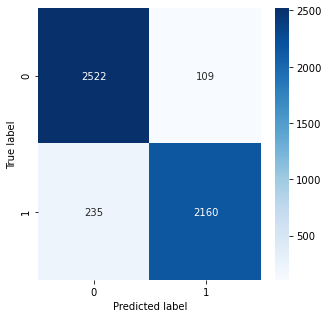

In [153]:
#Print out the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt =".0f", ax=ax,cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [154]:
#Build a pipeline to allow the model to predict any article

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
RF_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('model', rf),
])

RF_pipeline.fit(train_data['total'], train_data['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier(criterion='entropy'))])

In [155]:
#Testing my model on a fake article

test_text = "WASHINGTON, D.C. — A review of FBI Director James Comey’s professional history and relationships shows that the Obama cabinet leader — now under fire for his handling of the investigation of Hillary Clinton — is deeply entrenched in the big-money cronyism culture of Washington, D.C. His personal and professional relationships — all undisclosed as he announced the Bureau would not prosecute Clinton — reinforce bipartisan concerns that he may have politicized the criminal probe. These concerns focus on millions of dollars that Comey accepted from a Clinton Foundation defense contractor, Comey’s former membership on a Clinton Foundation corporate partner’s board, and his surprising financial relationship with his brother Peter Comey, who works at the law firm that does the Clinton Foundation’s taxes. Lockheed Martin When President Obama nominated Comey to become FBI director in 2013, Comey promised the United States Senate that he would recuse himself on all cases involving former employers. But Comey earned $6 million in one year alone from Lockheed Martin. Lockheed Martin became a Clinton Foundation donor that very year. Comey served as deputy attorney general under John Ashcroft for two years of the Bush administration. When he left the Bush administration, he went directly to Lockheed Martin and became vice president, acting as a general counsel. How much money did James Comey make from Lockheed Martin in his last year with the company, which he left in 2010? More than $6 million in compensation. Lockheed Martin is a Clinton Foundation donor. The company admitted to becoming a Clinton Global Initiative member in 2010. According to records, Lockheed Martin is also a member of the American Chamber of Commerce in Egypt, which paid Bill Clinton $250,000 to deliver a speech in 2010. In 2010, Lockheed Martin won 17 approvals for private contracts from the Hillary Clinton State Department. HSBC Holdings In 2013, Comey became a board member, a director, and a Financial System Vulnerabilities Committee member of the London bank HSBC Holdings. “Mr. Comey’s appointment will be for an initial three-year term which, subject to re-election by shareholders, will expire at the conclusion of the 2016 Annual General Meeting,” according to HSBC company records. HSBC Holdings and its various philanthropic branches routinely partner with the Clinton Foundation. For instance, HSBC Holdings has partnered with Deutsche Bank through the Clinton Foundation to “retrofit 1,500 to 2,500 housing units, primarily in the low- to moderate-income sector” in “New York City.” “Retrofitting” refers to a Green initiative to conserve energy in commercial housing units. Clinton Foundation records show that the Foundation projected “$1 billion in financing” for this Green initiative to conserve people’s energy in low-income housing units. Who Is Peter Comey? When our source called the Chinatown offices of D.C. law firm DLA Piper and asked for “Peter Comey,” a receptionist immediately put him through to Comey’s direct line. But Peter Comey is not featured on the DLA Piper website. Peter Comey serves as “Senior Director of Real Estate Operations for the Americas” for DLA Piper. James Comey was not questioned about his relationship with Peter Comey in his confirmation hearing. DLA Piper is the firm that performed the independent audit of the Clinton Foundation in November during Clinton-World’s first big push to put the email scandal behind them. DLA Piper’s employees taken as a whole represent a major Hillary Clinton 2016 campaign donation bloc and Clinton Foundation donation base. DLA Piper ranks #5 on Hillary Clinton’s all-time career Top Contributors list, just ahead of Goldman Sachs. And here is another thing: Peter Comey has a mortgage on his house that is owned by his brother James Comey, the FBI director. Peter Comey’s financial records, obtained by Breitbart News, show that he bought a $950,000 house in Vienna, Virginia, in June 2008. He needed a $712,500 mortgage from First Savings Mortgage Corporation. But on January 31, 2011, James Comey and his wife stepped in to become Private Party lenders. They granted a mortgage on the house for $711,000. Financial records suggest that Peter Comey took out two such mortgages from his brother that day. This financial relationship between the Comey brothers began prior to James Comey’s nomination to become director of the FBI. DLA Piper did not answer Breitbart News’ question as to whether James Comey and Peter Comey spoke at any point about this mortgage or anything else during the Clinton email investigation. Peter Comey Re-Designed the FBI Building FBI Director James Comey grew up in the New Jersey suburbs with his brother Peter. Both Comeys were briefly taken captive in 1977 by the “Ramsey rapist,” but the boys managed to escape through a window in their home, and neither boy was harmed. James Comey became a prosecutor who worked on the Gambino crime family case. He went on to the Bush administration, a handful of private sector jobs, and then the Obama administration in 2013. Peter Comey, meanwhile, went into construction. After getting an MBA in real estate and urban development from George Washington University in 1998, Peter Comey became an executive at a company that re-designed George Washington University between 2004 and 2007 while his brother was in town working for the Bush administration. In January 2009, at the beginning of the Obama administration, Peter Comey became “a real estate and construction consultant” for Procon Consulting. Procon Consulting’s client list includes “FBI Headquarters Washington, DC.” So what did Procon Consulting do for FBI Headquarters? Quite a bit, apparently. According to the firm’s records: Procon provided strategic project management for the consolidation of over 11,000 FBI personnel into one, high security, facility. Since 1972 the Federal Bureau of Investigation has had its headquarters in a purpose built 2.1 million square foot building on Pennsylvania Avenue. Having become functionally obsolete and in need of major repairs, GSA and the FBI were considering ways to meet the space needs required to maintain the Bureau’s mission and consolidate over 11,000 personnel. Procon assisted GSA in assessing the FBI’s space needs and options for fulfilling those needs. Services provided included project management related to site evaluations, budgeting, due diligence, and the development of procurement and funding strategies. Those “funding strategies” included talking to “stakeholders”: “Worked with stakeholders and key leadership to identify strategic objectives, goals and long range plans for capital and real estate projects.” Procon Consulting obtained its contract for FBI Headquarters prior to James Comey’s nomination to serve as director of the FBI. In June 2011, Peter Comey left Procon Consulting to become “Senior Director of Real Estate Operations for the Americas” for DLA Piper. Peter Comey has generated some controversy in that role. According to Law360 in May 2013 (the same month that James Comey was confirmed as someone being considered by Obama to become FBI director): Two real estate services businesses filed a $10 million suit against the law firm Monday alleging it stiffed them on as much as $760,000 of work done at DLA Piper’s Chicago office and improperly gave proprietary information to a competitor. …. The plaintiffs take particular aim at Peter Comey, DLA Piper’s senior director of real estate operations. Leasecorp and SpaceLogik include several emails in the complaint that are purportedly from DLA Piper senior real estate partners Jay Epstein and Rich Klawiter and are sharply critical of Comey’s handling of the matter. In one email, Epstein wrote that “it’s an embarrassment for the firm to be treating someone who we are working with like this.” In another email allegedly from Klawiter on Feb. 20, the DLA Piper partner informed Leasecorp President Michael Walker, a principal for both plaintiffs, that Comey had sent him and Epstein an email claiming that the real estate services firms were behind on their contractual obligations."
RF_predict = RF_pipeline.predict([clean(test_text)])
if (RF_predict == 1):
    print("Given News is Predicted as Real")
else:
    print("Given News is Predicted as False")
    



Given News is Predicted as False
